In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
boston = load_boston()
boston.keys()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
boston.data_module

'sklearn.datasets.data'

In [4]:
bostondf = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
bostondf['PRICE'] = boston.target

In [6]:
bostondf.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [7]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

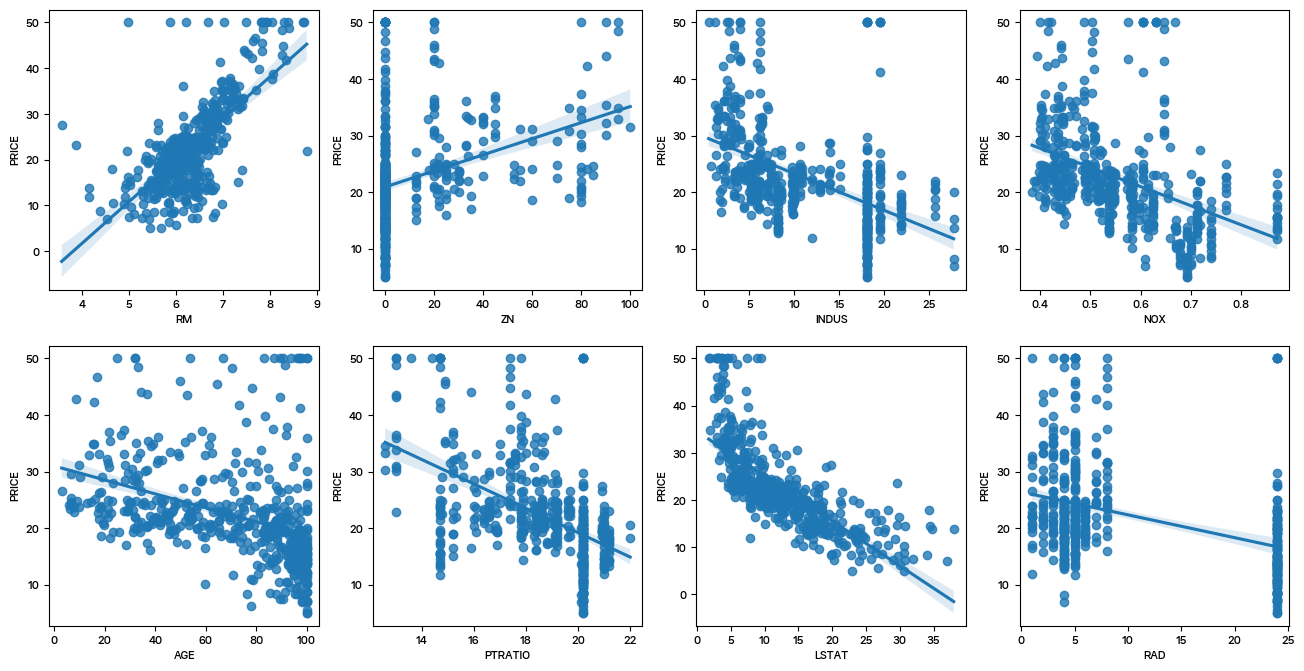

In [9]:
lm_features = ['RM','ZN', 'INDUS', 'NOX','AGE','PTRATIO','LSTAT', 'RAD']
fig ,axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
for i,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data=bostondf, ax=axs[row][col])

In [10]:
y_target = bostondf['PRICE']
X_data = bostondf.drop(columns='PRICE')
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=156)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test) 
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print(f'mse:{mse: .3f}, rmse:{rmse: .3f}, r2:{r2: .3f}')

mse: 17.297, rmse: 4.159, r2: 0.757


In [12]:
print('절편:',lr.intercept_)
print('회귀계수값:', np.round(lr.coef_,1))

절편: 40.99559517216473
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
X_test[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,0.17446,0.0,10.59,1.0,0.489,5.96,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


In [14]:
y_preds[:1]

array([23.15424087])

In [15]:
# 회기계수
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
y = bostondf['PRICE']
X = bostondf.drop(columns='PRICE')
lr = LinearRegression()
neg_mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5) # 분류에서 cross_val_scored은 클수록, 회귀에서 cross_val_score은 작을수록 좋음 그래서 회귀에 neg 씀(마이너스 처리함)

In [18]:
np.mean(-neg_mse) # 교차검증, mse/ neg_mse의 반대

37.13180746769912

In [19]:
np.sqrt(np.mean(-neg_mse)) #교차검증, rmse/ mse보다 과적합이 덜 함

6.093587405436892

In [20]:
# 릿지 회귀

In [21]:
from sklearn.linear_model import Ridge

In [22]:
# alpha=10으로 설정해 릿지회귀 수행
ridge = Ridge(alpha=10) # alpha값에 따라 회귀계수가 변동
neg_mse_scores = cross_val_score(ridge, 
                                 X,
                                 y,
                                 scoring='neg_mean_squared_error',
                                 cv = 5) # X:입력값, y: 결과값(정답 scoring: 평가방법(neg 붙은 이유: 회귀 쪽은 차이가 적은 게 좋은 값이라 
rmse_scores = np.sqrt(-neg_mse_scores)

In [23]:
-neg_mse_scores

array([11.4217962 , 24.29446706, 28.14355069, 74.59916618, 28.51714218])

In [24]:
rmse_scores

array([3.3796148 , 4.92894178, 5.30504955, 8.63708088, 5.3401444 ])

In [25]:
np.mean(rmse_scores) 

5.518166280868961

In [26]:
alphas = [0,0.1,1,10,100,150]
for alpha in alphas:
    ridge = Ridge(alpha=alpha) 
    neg_mse_scores = cross_val_score(ridge,
                                     X,
                                     y,
                                     scoring='neg_mean_squared_error',
                                     cv = 5) # cross_val_score: 교차검증
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print(f'alpha:{alpha} rmse:{avg_rmse}')

alpha:0 rmse:5.828658946215792
alpha:0.1 rmse:5.7884866270323965
alpha:1 rmse:5.652570965613532
alpha:10 rmse:5.518166280868961
alpha:100 rmse:5.329589628472134
alpha:150 rmse:5.328307999785966


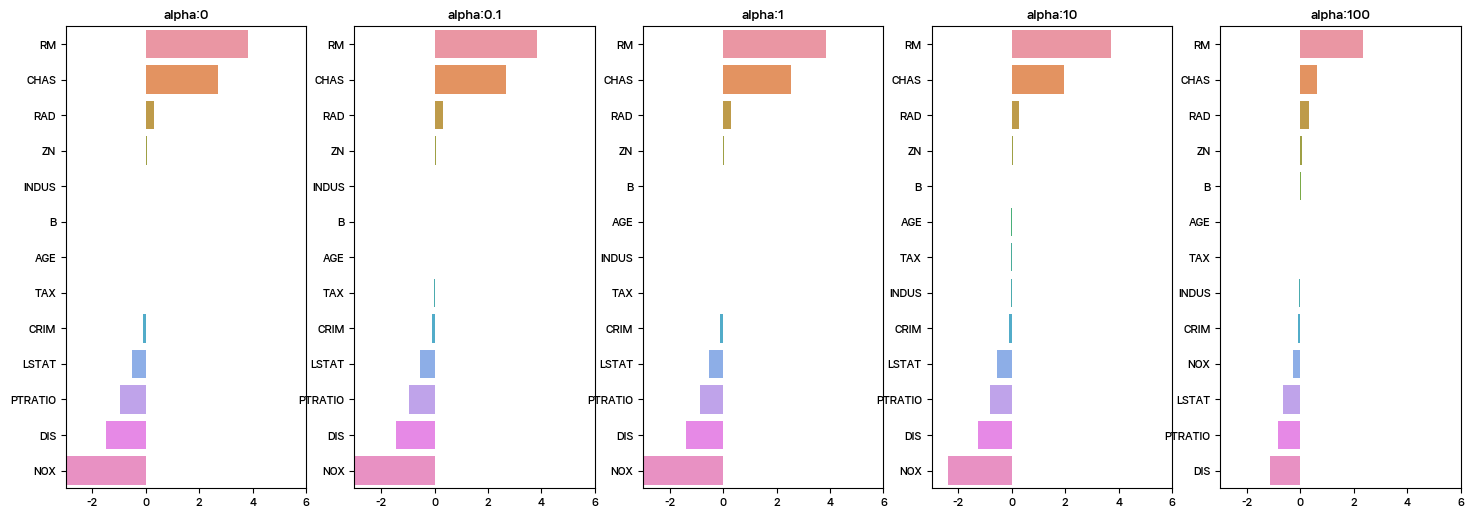

In [27]:
fig, axs =  plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
alphas = [0,0.1,1,10,100]
plt.rcParams['axes.unicode_minus'] = False
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(data=ridge.coef_,index=X.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [28]:
alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(alphas[0]) # 회귀계수 값을 줄이지만 0으로 만들지 않음
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [29]:
from sklearn.linear_model import Lasso,ElasticNet

In [30]:
def get_linear_reg_eval(model_name,params=None,X=None,y=None,verbose=True,return_coeff=True): # verbose: 실행 중에 관련 로그 출력 여부
    coeff = pd.DataFrame()
    if verbose:print('#######',model_name,'######')
    for param in params:
        if model_name == 'Ridge':model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param,l1_ratio=0.07)
        neg_mse_scores = cross_val_score(model,
                                         X,
                                         y,
                                         scoring='neg_mean_squared_error',
                                         cv=5)
        avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
        print(f'alpha {param} rmse:{avg_rmse}')
        model.fit(X,y)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [31]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',lasso_alphas,X,y)

####### Lasso ######
alpha 0.07 rmse:5.612284267526676
alpha 0.1 rmse:5.615116035266936
alpha 0.5 rmse:5.6691234095948975
alpha 1 rmse:5.776020813823376
alpha 3 rmse:6.1887632108009045


In [32]:
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:0.07,alpha:0.5,alpha:3
RM,3.809865,3.703202,0.949811,3.702272,2.334536,3.789725,2.498212,0.000000
CHAS,2.686734,0.955190,0.000000,1.952021,0.638335,1.434343,0.000000,0.000000
RAD,0.306049,0.274707,0.264206,0.279596,0.315358,0.270936,0.277451,0.061864
ZN,0.046420,0.049211,0.049165,0.049579,0.054496,0.049059,0.049544,0.037231
INDUS,0.020559,-0.036619,-0.000000,-0.042962,-0.052826,-0.042120,-0.005253,-0.000000
B,0.009312,0.010249,0.008247,0.010037,0.009393,0.010248,0.009469,0.006510
AGE,0.000692,-0.010037,0.020910,-0.010707,0.001212,-0.011706,0.003604,0.042495
TAX,-0.012335,-0.014570,-0.015212,-0.013993,-0.015856,-0.014290,-0.015442,-0.008602
CRIM,-0.108011,-0.097894,-0.063437,-0.101435,-0.102202,-0.098193,-0.083289,-0.000000
LSTAT,-0.524758,-0.568769,-0.761115,-0.559366,-0.660764,-0.560431,-0.656290,-0.807679


In [33]:
# 엘라스틱넷 회귀
# L2규제와 L1규제 결합
# 엘라스틱넷 회귀 비용함수의 목표는 최소화하는 W를 찾는 것
# 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 중요 피처만 셀렉션하고 나머지들은 0으로 만드는 경향
# alpha값에 따라 급격히 변동할 수 있음

In [34]:
elastic_alphas=[0.05,0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',elastic_alphas,X,y)

####### ElasticNet ######
alpha 0.05 rmse:5.467801200918887
alpha 0.07 rmse:5.436458601774522
alpha 0.1 rmse:5.4020884573678085
alpha 0.5 rmse:5.349421080016163
alpha 1 rmse:5.427759600148015
alpha 3 rmse:5.682211784219932


In [35]:
coeff_elastic_df.sort_values(by='alpha:0.05',ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:0.07,alpha:0.5,alpha:3,alpha:0.05
RM,3.809865,2.966292,0.930297,3.702272,2.334536,3.211104,1.486876,0.382022,3.397370
CHAS,2.686734,0.998066,0.119882,1.952021,0.638335,1.224762,0.267229,0.004553,1.441688
RAD,0.306049,0.299362,0.325620,0.279596,0.315358,0.292782,0.327970,0.279388,0.287564
ZN,0.046420,0.052627,0.054930,0.049579,0.054496,0.051755,0.055478,0.053616,0.051019
B,0.009312,0.009765,0.008354,0.010037,0.009393,0.009888,0.008817,0.007815,0.009968
AGE,0.000692,-0.005013,0.021615,-0.010707,0.001212,-0.007230,0.011916,0.034489,-0.008794
TAX,-0.012335,-0.015184,-0.016785,-0.013993,-0.015856,-0.014867,-0.016562,-0.016083,-0.014592
INDUS,0.020559,-0.050246,-0.039317,-0.042962,-0.052826,-0.049069,-0.048246,-0.023439,-0.047796
CRIM,-0.108011,-0.101986,-0.093958,-0.101435,-0.102202,-0.101830,-0.098912,-0.081249,-0.101634
LSTAT,-0.524758,-0.616245,-0.753922,-0.559366,-0.660764,-0.598328,-0.719443,-0.759834,-0.584320


In [36]:
# 선형 회귀 모델을 위한 데이터 변환
# 선형 모델은 선형함수를 찾아내 결과값을 예측
# 피처값과 타깃값의 분포가 정규분포 형태를 매우 선호

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures

In [40]:
def get_scales_data(method='None',p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data) # 로그 변환인 경우에는 언더 플로우를 방지하기 위해서 1+log( ) 함수를 구현
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [41]:
alphas = [0.1,1,1,100]
scale_methods = [(None,None),
                 ('Standard',None),
                 ('Standard',2),
                 ('MinMax',None),
                 ('MinMax',None),
                 ('Log',None)]
for scale_method in scale_methods:
    X_scaled = get_scales_data(scale_method[0],scale_method[1],X)
    get_linear_reg_eval('Ridge',alphas,X_scaled,y,return_coeff=False)

####### Ridge ######
alpha 0.1 rmse:5.7884866270323965
alpha 1 rmse:5.652570965613532
alpha 1 rmse:5.652570965613532
alpha 100 rmse:5.329589628472134
####### Ridge ######
alpha 0.1 rmse:5.825992799389427
alpha 1 rmse:5.802889517257725
alpha 1 rmse:5.802889517257725
alpha 100 rmse:5.421374711794965
####### Ridge ######
alpha 0.1 rmse:8.827235873001936
alpha 1 rmse:6.871287525963547
alpha 1 rmse:6.871287525963547
alpha 100 rmse:4.634437778261921
####### Ridge ######
alpha 0.1 rmse:5.763570225288305
alpha 1 rmse:5.465045081564941
alpha 1 rmse:5.465045081564941
alpha 100 rmse:7.634919863623537
####### Ridge ######
alpha 0.1 rmse:5.763570225288305
alpha 1 rmse:5.465045081564941
alpha 1 rmse:5.465045081564941
alpha 100 rmse:7.634919863623537
####### Ridge ######
alpha 0.1 rmse:4.770429614681668
alpha 1 rmse:4.676227018966882
alpha 1 rmse:4.676227018966882
alpha 100 rmse:6.2409162327190355
